In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('ipldata_19/matches.csv')

In [3]:
matches.shape

(756, 18)

In [4]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
pd.value_counts(matches['winner'])

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [8]:
pd.value_counts(matches['player_of_match']).head()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
Name: player_of_match, dtype: int64

In [12]:
matches.drop_duplicates(subset='season', keep='last')[['season', 'winner']]

,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


In [14]:
matches.drop_duplicates(subset='season', keep='last')[['season', 'winner']].reset_index(drop=True)

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


In [16]:
matches.drop_duplicates(subset='season', keep='last')[['season', 'winner']].reset_index(drop=True).sort_values(by='season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [17]:
deliveries = pd.read_csv('ipldata_19/deliveries.csv')

In [18]:
deliveries.shape

(179078, 21)

In [19]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [20]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
six_df = deliveries[deliveries['batsman_runs'] == 6]

In [22]:
six_df.shape

(8170, 21)

In [24]:
pd.value_counts(six_df['batsman']).head()

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
Name: batsman, dtype: int64

In [25]:
temp_df = deliveries.dropna(subset=['player_dismissed'])

In [26]:
temp_df.shape

(8834, 21)

In [27]:
temp_df = temp_df[temp_df['dismissal_kind'] != 'run out']

In [28]:
temp_df.shape

(7982, 21)

In [30]:
pd.value_counts(temp_df['bowler']).head()

SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
Name: bowler, dtype: int64

In [41]:
deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head()

batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

In [43]:
deliveries.groupby(['match_id','batsman'])['batsman_runs'].sum().sort_values(ascending=False).head()

match_id  batsman       
411       CH Gayle          175
60        BB McCullum       158
562       AB de Villiers    133
7935      RR Pant           130
620       AB de Villiers    129
Name: batsman_runs, dtype: int64

In [44]:
# 1. Most Catches
# 2. Pick any one batsman, find out the runs scored by him in those matches where he was given man of the match

### Data Visualization

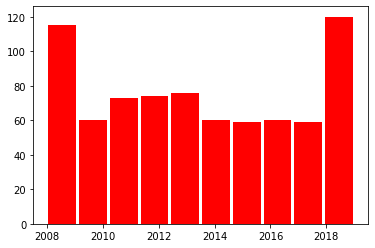

In [49]:
plt.hist(matches['season'],rwidth=0.9,color='red')
plt.show()

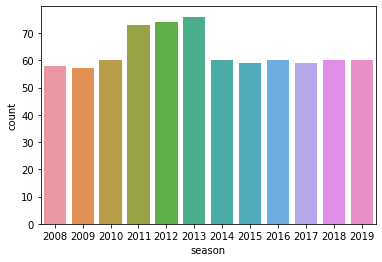

In [51]:
sns.countplot(x=matches['season'])
plt.show()

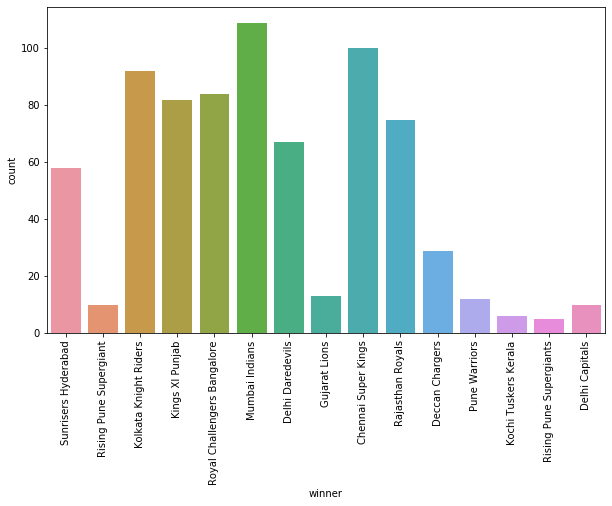

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(x=matches['winner'])
plt.xticks(rotation='vertical')
plt.show()

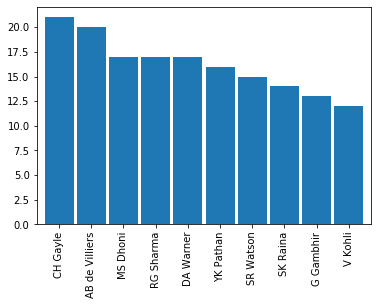

In [61]:
matches['player_of_match'].value_counts().head(10).plot.bar(width=0.9)